## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [2]:
Heart_Disease_Dataset = pd.read_csv("C:/Users/parth/OneDrive/Desktop/Heart_Disease_Prediction/Dataset/Dataset.csv")
Heart_Disease_Dataset.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

#  Exploratory Data Analysis (EDA) 
Goal is to learn more about the data and become an export topic in the dataset working with.


In [3]:
pd.set_option("display.float", "{:.2f}".format)
Heart_Disease_Dataset.describe()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
count 605.00 605.00 605.00    605.00 605.00 605.00   605.00   605.00 605.00   
mean   54.36   0.68   0.97    131.63 246.28   0.15     0.53   149.61   0.33   
std     9.08   0.47   1.03     17.54  51.83   0.36     0.53    22.88   0.47   
min    29.00   0.00   0.00     94.00 126.00   0.00     0.00    71.00   0.00   
25%    47.00   0.00   0.00    120.00 211.00   0.00     0.00   133.00   0.00   
50%    55.00   1.00   1.00    130.00 240.00   0.00     1.00   153.00   0.00   
75%    61.00   1.00   2.00    140.00 275.00   0.00     1.00   166.00   1.00   
max    77.00   1.00   3.00    200.00 564.00   1.00     2.00   202.00   1.00   

       oldpeak  slope     ca   thal  target  
count   605.00 605.00 605.00 605.00  605.00  
mean      1.04   1.40   0.73   2.31    0.55  
std       1.16   0.62   1.02   0.61    0.50  
min       0.00   0.00   0.00   0.00    0.00  
25%       0.00   1.00   0.00   2.00    0.00  
50%       0.80   1.00   0.00   2.00    1.00  
75%       1.60   2.00   1.00   3.00    1.00  
max       6.20   2.00   4.00   3.00    1.00

<AxesSubplot:>

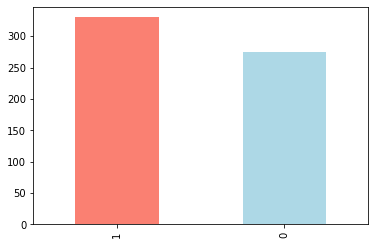

In [4]:
Heart_Disease_Dataset.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [5]:
# Checking for messing values
Heart_Disease_Dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Looks like the perfect dataset!!! No null values :-)

In [6]:
All_Categorical_Value = []
All_Continous_Values = []

In [7]:

for column_index in Heart_Disease_Dataset.columns:
    print('\n\n****************************************')
    print("Looking for",f"{column_index} "+"Column >> "+f"{Heart_Disease_Dataset[column_index].unique()}")
    if len(Heart_Disease_Dataset[column_index].unique()) <= 10:
        All_Categorical_Value.append(column_index)
    else:
        All_Continous_Values.append(column_index)



****************************************
Looking for age Column >> [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


****************************************
Looking for sex Column >> [1 0]


****************************************
Looking for cp Column >> [3 2 1 0]


****************************************
Looking for trestbps Column >> [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


****************************************
Looking for chol Column >> [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160

In [8]:
All_Categorical_Value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
All_Continous_Values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

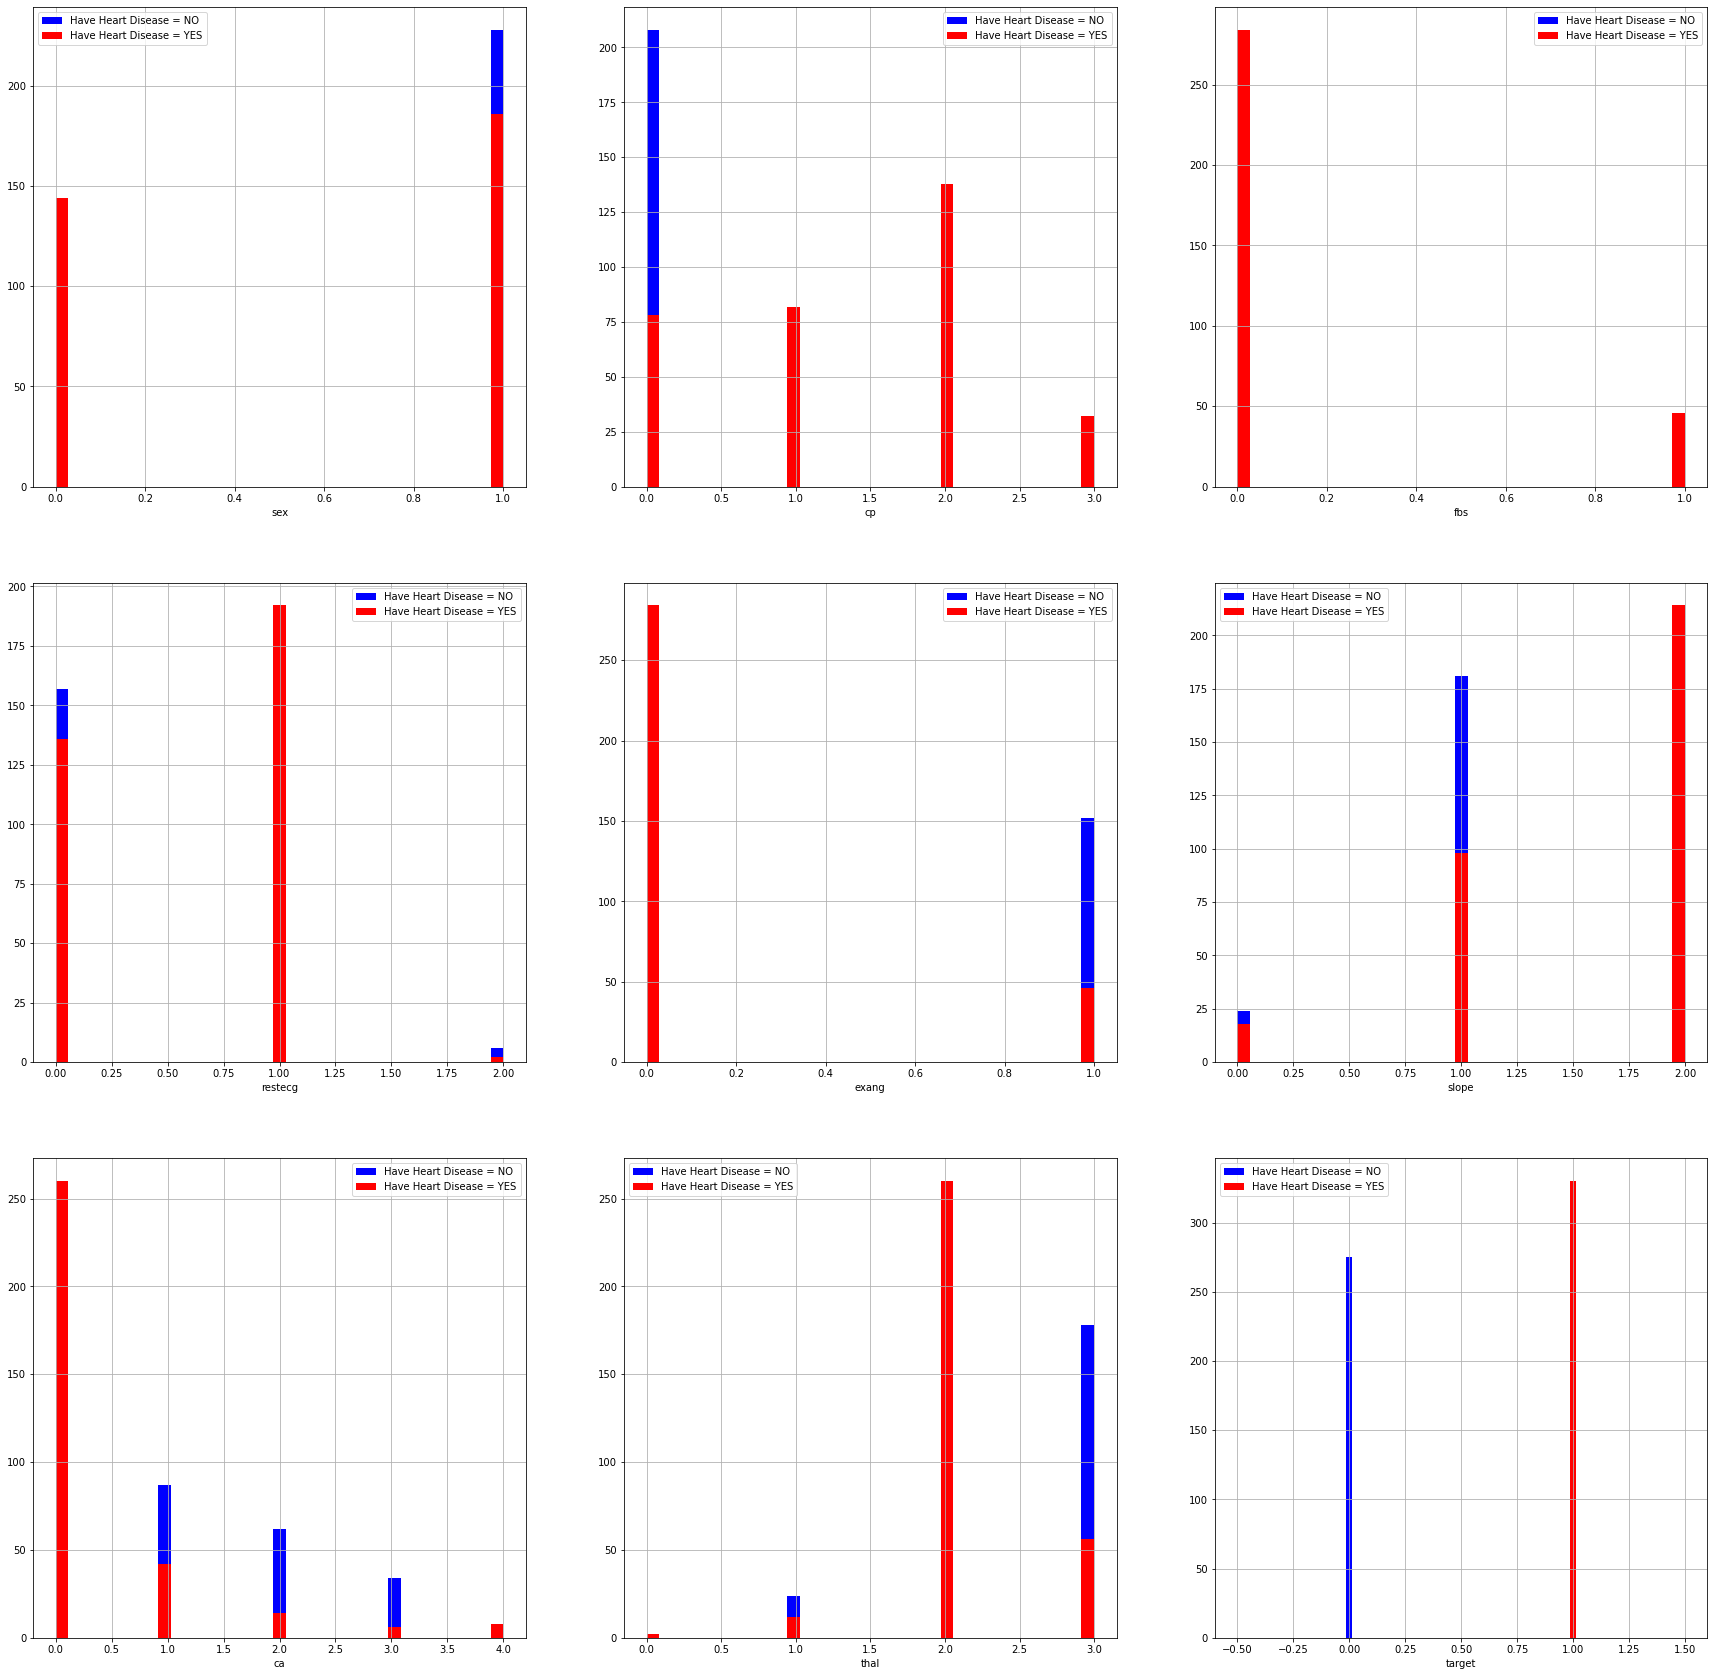

In [10]:
plt.figure(figsize=(30, 30))

for index, column_index in enumerate(All_Categorical_Value, 1):
    plt.subplot(3, 3, index)
    bins = Heart_Disease_Dataset[Heart_Disease_Dataset["target"] == 0][column_index].hist(bins=35, color='blue', label='Have Heart Disease = NO')
    Heart_Disease_Dataset[Heart_Disease_Dataset["target"] == 1][column_index].hist(bins=35, color='red', label='Have Heart Disease = YES')
    plt.legend()
    plt.xlabel(column_index)
   
    

- `cp` {chest pain}: People with cp equal to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0
- `restecg` {resting electrocardiographic results}: People with a value of 1 (signals heartbeat, can range from mild symptoms to severe Problems) are more likely to have heart disease. 
- `exang` {exercise-induced angina pectoris}: people with a value of 0 (No ==> exercise-induced angina pectoris) have more heart disease than people with a value of 1 (yes ==> exercise-induced angina pectoris)
- `slope` {the slope of the maximum exercise- ST segment}: People with a slope value of 2 (downslopins: signs of a sick heart) are more likely to have heart disease than people with a slope value of 0 (upsloping: better heart rate during exercise) or 1 (flatsloping: minimal change (typical healthy heart) ).
- `ca` {number of main vessels colored by bloom (0-3)} - the more blood moves, the better, so that people with approx. 0 suffer from heart diseases more often. {Thallium Stress Result} - People with this e Qual to 2 value (solid defect: used to be a defect, but now it's okay) are more likely to have heart disease.

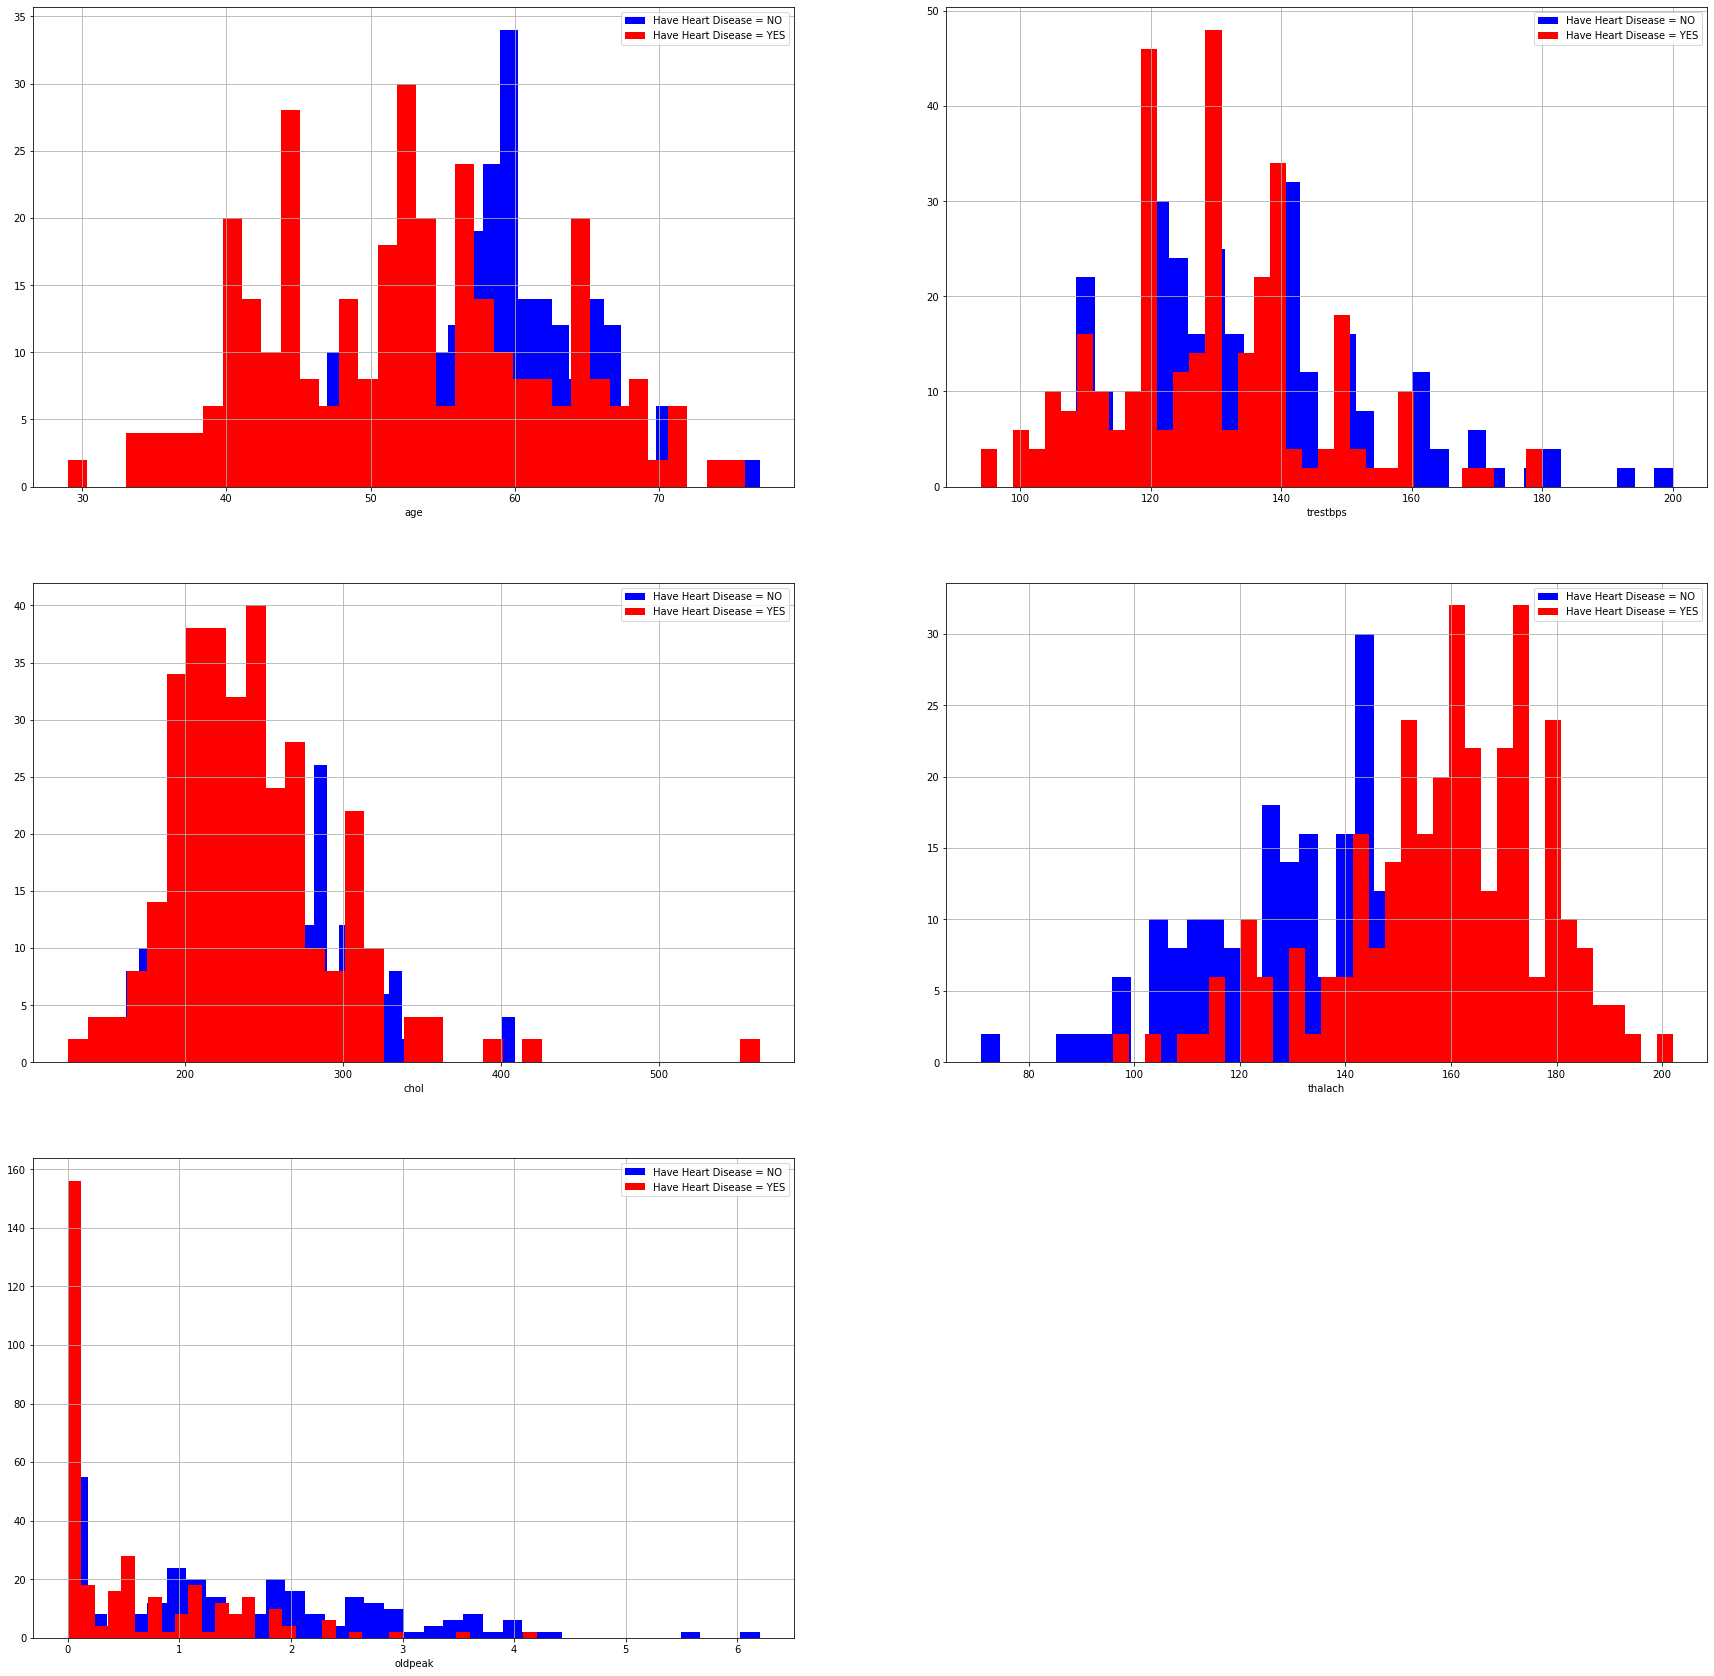

In [11]:
plt.figure(figsize=(30, 30))

for index, column in enumerate(All_Continous_Values, 1):
    plt.subplot(3, 2, index)
    Heart_Disease_Dataset[Heart_Disease_Dataset["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO')
    Heart_Disease_Dataset[Heart_Disease_Dataset["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

- `trestbps` : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
- `chol` {serum cholestoral in mg/dl} : above 200 is cause for concern.
- `thalach` {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
- `oldpeak` ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

In [12]:
plt.rcParams['figure.figsize'] = (20, 20)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

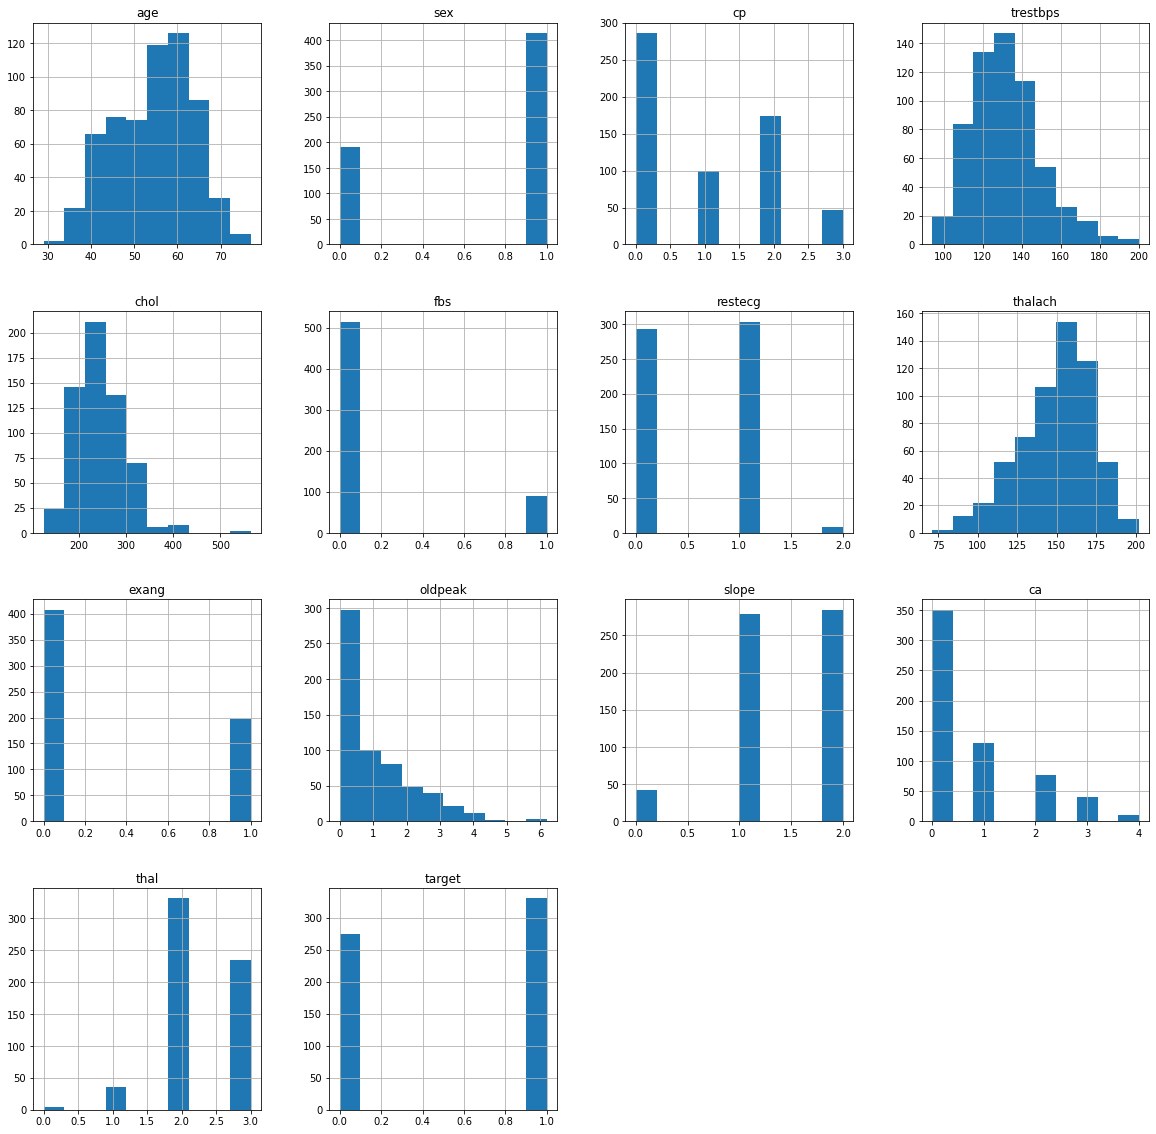

In [13]:
Heart_Disease_Dataset.hist()

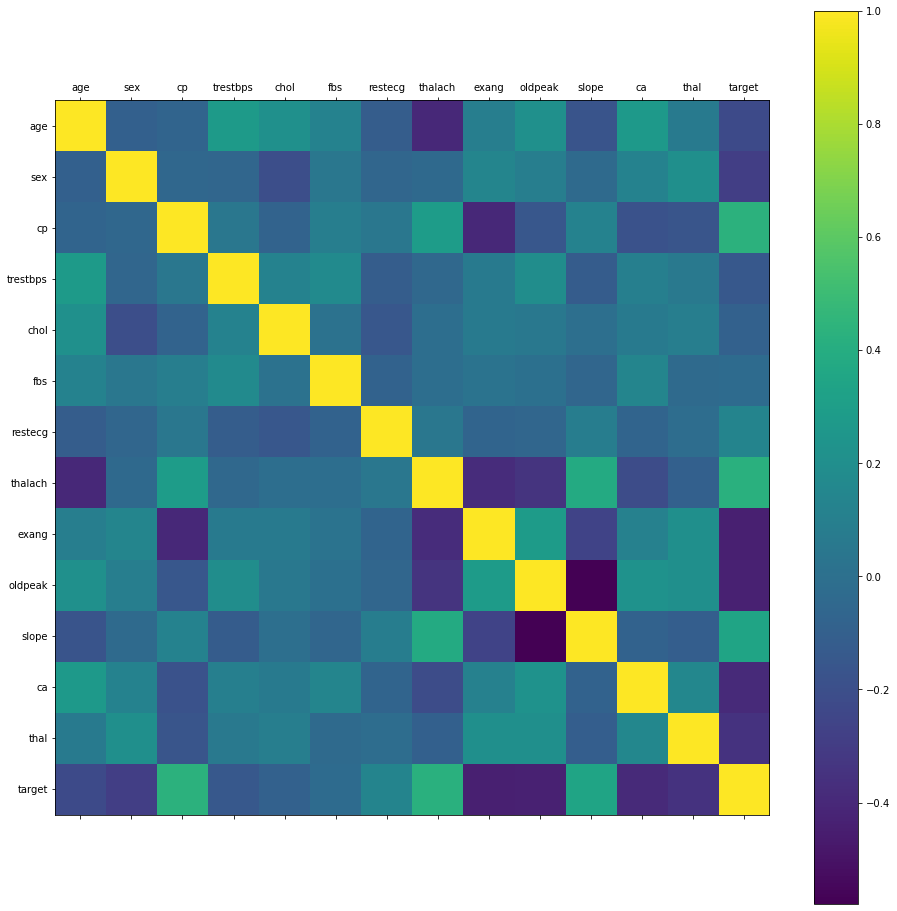

In [14]:
plt.matshow(Heart_Disease_Dataset.corr())
plt.yticks(np.arange(Heart_Disease_Dataset.shape[1]), Heart_Disease_Dataset.columns)
plt.xticks(np.arange(Heart_Disease_Dataset.shape[1]), Heart_Disease_Dataset.columns)
plt.colorbar()

# Droping Target Value

<AxesSubplot:title={'center':'Correlation with target'}>

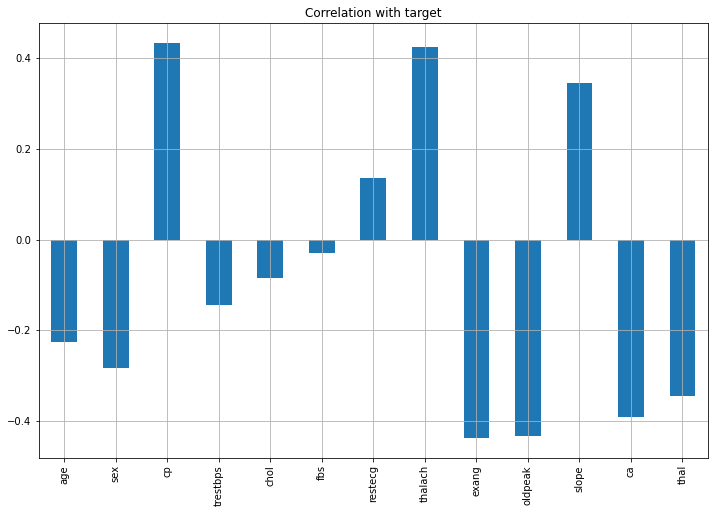

In [15]:
Heart_Disease_Dataset.drop('target', axis=1).corrwith(Heart_Disease_Dataset.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

<AxesSubplot:>

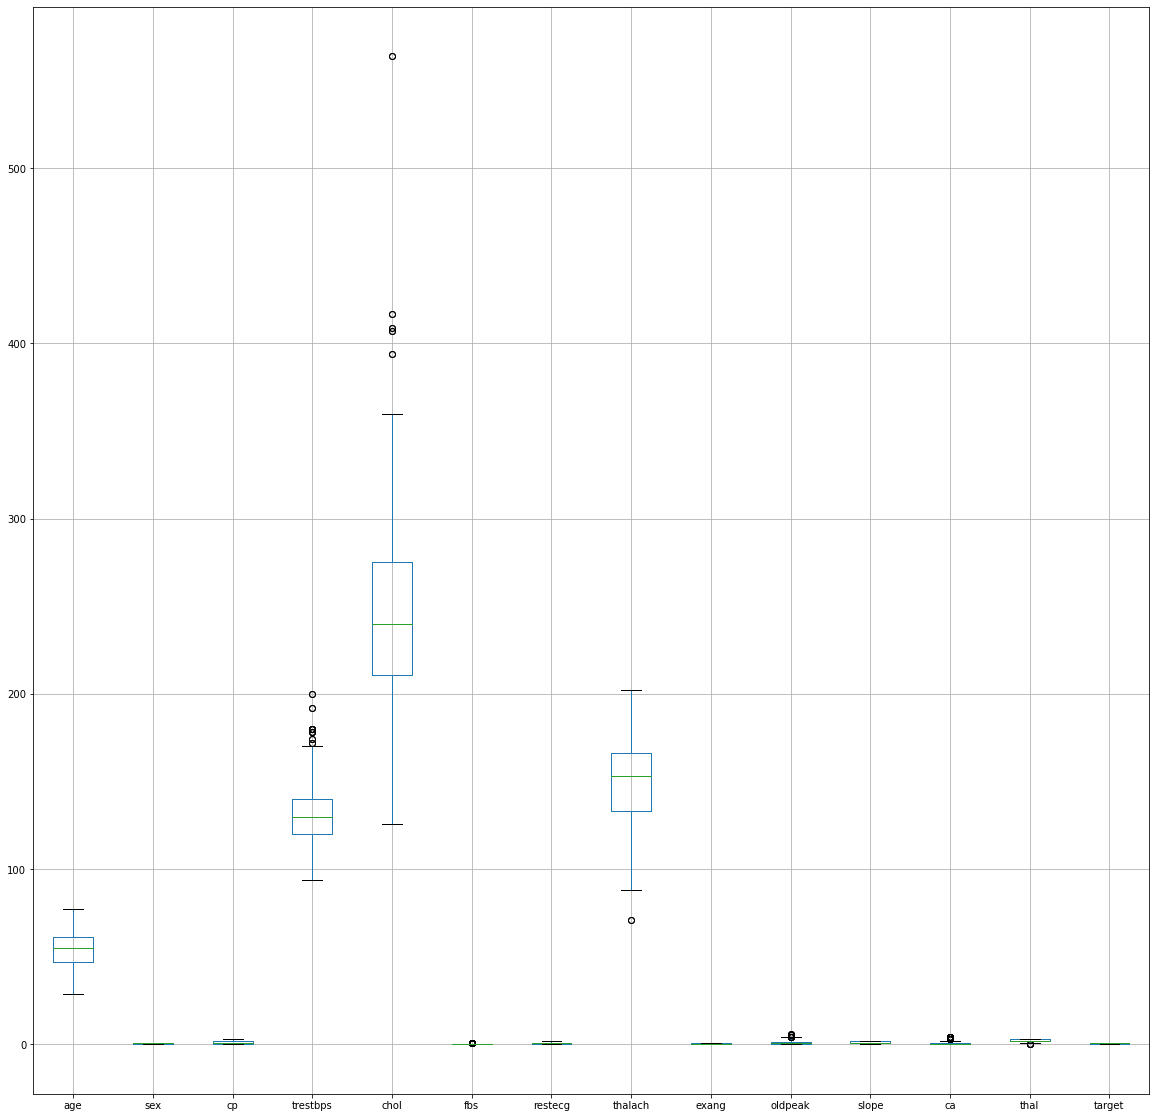

In [16]:
Heart_Disease_Dataset.boxplot()

In [17]:
All_Categorical_Value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [18]:
All_Categorical_Value.remove('target')
Heart_Disease_Dataset = pd.get_dummies(Heart_Disease_Dataset, columns = All_Categorical_Value)

In [19]:
Heart_Disease_Dataset.head()

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0   63       145   233      150     2.30       1      0      1     0     0   
1   37       130   250      187     3.50       1      0      1     0     0   
2   41       130   204      172     1.40       1      1      0     0     1   
3   56       120   236      178     0.80       1      0      1     0     1   
4   57       120   354      163     0.60       1      1      0     1     0   

   ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        1     1     0     0     0     0       0       0       1       0  
3  ...        1     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 31 columns]

In [20]:
print(Heart_Disease_Dataset.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
conv_col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Heart_Disease_Dataset[conv_col_to_scale] = scaler.fit_transform(Heart_Disease_Dataset[conv_col_to_scale])

In [22]:
Heart_Disease_Dataset.head()

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0  0.95      0.76 -0.26     0.02     1.09       1      0      1     0     0   
1 -1.91     -0.09  0.07     1.64     2.12       1      0      1     0     0   
2 -1.47     -0.09 -0.82     0.98     0.31       1      1      0     0     1   
3  0.18     -0.66 -0.20     1.24    -0.21       1      0      1     0     1   
4  0.29     -0.66  2.08     0.59    -0.38       1      1      0     1     0   

   ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        1     1     0     0     0     0       0       0       1       0  
3  ...        1     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 31 columns]

#  Applying machine learning algorithms

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [24]:

def print_training_accuracy_score(algorithm_classifier, X_train, y_train):
    prediction = algorithm_classifier.predict(X_train)
    clf_report = classification_report(y_train, prediction, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report)
    print("\n\n >> Train Result:\n**********************************\n")
    print(f" >> Accuracy : {accuracy_score(y_train, prediction) * 100:.2f}%")
    print("---------------------------------------------------------------")
    print(f"\n >> CLASSIFICATION REPORT:\n{clf_report_df}")
        
        
        
        
def print_testing_accuracy_score(algorithm_classifier, X_test, y_test):
    prediction = algorithm_classifier.predict(X_test)
    clf_report = classification_report(y_test, prediction, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report)
    print("\n\n\n >> Testing Result:\n**********************************\n")
    print(f" >> Accuracy : {accuracy_score(y_test, prediction) * 100:.2f}%")
    print("---------------------------------------------------------------")
    print(f"\n >> CLASSIFICATION REPORT:\n\n{clf_report_df}")



In [25]:

X = Heart_Disease_Dataset.drop('target', axis=1)
y = Heart_Disease_Dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_training_accuracy_score(lr_clf, X_train, y_train)
print_testing_accuracy_score(lr_clf, X_test, y_test)



 >> Train Result:
**********************************

 >> Accuracy : 86.29%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.86      0.86       0.86          0.86
recall      0.83   0.89      0.86       0.86          0.86
f1-score    0.85   0.88      0.86       0.86          0.86
support   193.00 230.00      0.86     423.00        423.00



 >> Testing Result:
**********************************

 >> Accuracy : 88.46%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:

              0      1  accuracy  macro avg  weighted avg
precision  0.92   0.86      0.88       0.89          0.89
recall     0.82   0.94      0.88       0.88          0.88
f1-score   0.86   0.90      0.88       0.88          0.88
support   82.00 100.00      0.88     182.00        182.00


##  2. K-nearest neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_training_accuracy_score(knn_clf, X_train, y_train)
print_testing_accuracy_score(knn_clf, X_test, y_test)



 >> Train Result:
**********************************

 >> Accuracy : 85.58%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.86      0.86       0.86          0.86
recall      0.82   0.88      0.86       0.85          0.86
f1-score    0.84   0.87      0.86       0.85          0.86
support   193.00 230.00      0.86     423.00        423.00



 >> Testing Result:
**********************************

 >> Accuracy : 85.71%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:

              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.84      0.86       0.86          0.86
recall     0.79   0.91      0.86       0.85          0.86
f1-score   0.83   0.87      0.86       0.85          0.86
support   82.00 100.00      0.86     182.00        182.00


## 3. Support Vector machine

In [28]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_training_accuracy_score(svm_clf, X_train, y_train)
print_testing_accuracy_score(svm_clf, X_test, y_test)



 >> Train Result:
**********************************

 >> Accuracy : 93.14%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.92      0.93       0.93          0.93
recall      0.91   0.95      0.93       0.93          0.93
f1-score    0.92   0.94      0.93       0.93          0.93
support   193.00 230.00      0.93     423.00        423.00



 >> Testing Result:
**********************************

 >> Accuracy : 93.41%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:

              0      1  accuracy  macro avg  weighted avg
precision  0.94   0.93      0.93       0.93          0.93
recall     0.91   0.95      0.93       0.93          0.93
f1-score   0.93   0.94      0.93       0.93          0.93
support   82.00 100.00      0.93     182.00        182.00


## 4. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_training_accuracy_score(rf_clf, X_train, y_train)
print_testing_accuracy_score(rf_clf, X_test, y_test)



 >> Train Result:
**********************************

 >> Accuracy : 100.00%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   193.00 230.00      1.00     423.00        423.00



 >> Testing Result:
**********************************

 >> Accuracy : 96.70%
---------------------------------------------------------------

 >> CLASSIFICATION REPORT:

              0      1  accuracy  macro avg  weighted avg
precision  0.97   0.96      0.97       0.97          0.97
recall     0.95   0.98      0.97       0.97          0.97
f1-score   0.96   0.97      0.97       0.97          0.97
support   82.00 100.00      0.97     182.00        182.00
